# 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. load data

In [2]:
diabetes = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data Mining/dinkes-od_17448_jml_penderita_diabetes_melitus__kabupatenkota_v3_data.xlsx")
lahir = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data Mining/dinkes-od_17543_jumlah_lahir_hidup_berdasarkan_kabupatenkota_v2_data.xlsx")
print("DATA DIABETES:")
display(diabetes.head())
print("DATA LAHIR HIDUP:")
display(lahir.head())


# 3. data cleansing

In [3]:
diabetes_clean = diabetes[['nama_kabupaten_kota', 'jumlah_penderita_dm', 'tahun']]
lahir_clean = lahir[['nama_kabupaten_kota', 'jumlah_lahir_hidup', 'tahun']]
merged = pd.merge(diabetes_clean, lahir_clean, on=['nama_kabupaten_kota', 'tahun'], how='inner')
print("\n🔍 CEK DATA:")
print(merged.info())
print("\nJumlah Missing Values:")
print(merged.isnull().sum())


🔍 CEK DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nama_kabupaten_kota  135 non-null    object
 1   jumlah_penderita_dm  135 non-null    int64 
 2   tahun                135 non-null    int64 
 3   jumlah_lahir_hidup   135 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.3+ KB
None

Jumlah Missing Values:
nama_kabupaten_kota    0
jumlah_penderita_dm    0
tahun                  0
jumlah_lahir_hidup     0
dtype: int64


## 4. data visualization

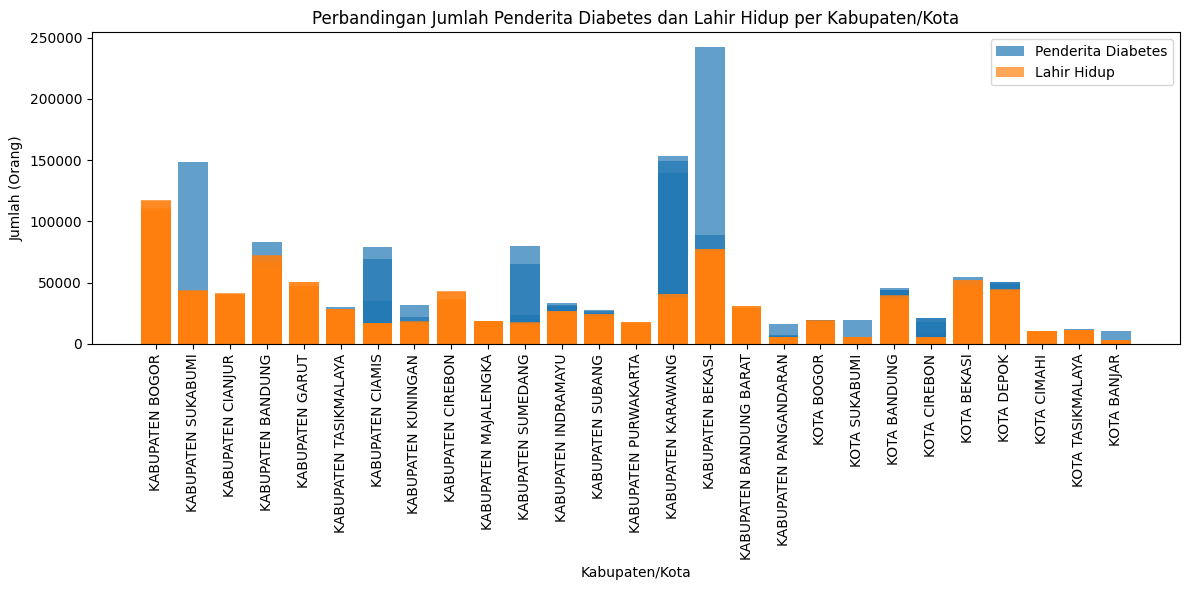

In [9]:
plt.figure(figsize=(12,6))
plt.bar(merged['nama_kabupaten_kota'], merged['jumlah_penderita_dm'], label='Penderita Diabetes', alpha=0.7)
plt.bar(merged['nama_kabupaten_kota'], merged['jumlah_lahir_hidup'], label='Lahir Hidup', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah (Orang)")
plt.title("Perbandingan Jumlah Penderita Diabetes dan Lahir Hidup per Kabupaten/Kota")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Exploratory Data

In [5]:
print("\n📊 Statistik Deskriptif:")
display(merged.describe())



📊 Statistik Deskriptif:


,jumlah_penderita_dm,tahun,jumlah_lahir_hidup
count,135.000000,135.000000,135.000000
mean,30689.488889,2021.000000,31168.288889
std,33894.212362,1.419481,24353.836164
min,0.000000,2019.000000,2704.000000
25%,12186.500000,2020.000000,16167.000000
50%,19570.000000,2021.000000,26382.000000
75%,40702.500000,2022.000000,42041.500000
max,242169.000000,2023.000000,117040.000000


# 7. heatmap korelasi pearson

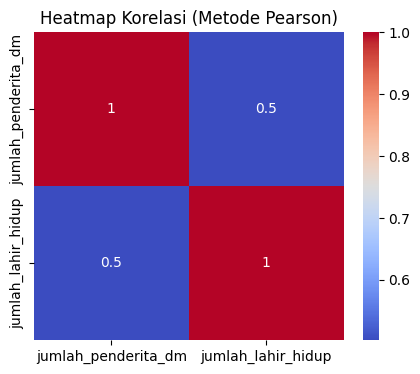

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(merged[['jumlah_penderita_dm', 'jumlah_lahir_hidup']].corr(method='pearson'),annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi (Metode Pearson)")
plt.show()


In [8]:
corr_value = merged[['jumlah_penderita_dm', 'jumlah_lahir_hidup']].corr(method='pearson').iloc[0,1]
print(f"Nilai Korelasi Pearson antara Jumlah Penderita Diabetes dan Jumlah Lahir Hidup = {corr_value:.3f}")

if corr_value > 0.5:
    print("➡️ Korelasi POSITIF KUAT: semakin tinggi angka kelahiran, cenderung lebih banyak penderita diabetes.")
elif corr_value > 0:
    print("➡️ Korelasi POSITIF LEMAH: hubungan searah tetapi tidak terlalu kuat.")
elif corr_value < -0.5:
    print("➡️ Korelasi NEGATIF KUAT: semakin tinggi angka kelahiran, penderita diabetes cenderung menurun.")
else:
    print("➡️ Tidak ada hubungan linear yang kuat antara kelahiran dan diabetes.")

Nilai Korelasi Pearson antara Jumlah Penderita Diabetes dan Jumlah Lahir Hidup = 0.502
➡️ Korelasi POSITIF KUAT: semakin tinggi angka kelahiran, cenderung lebih banyak penderita diabetes.
